In [ ]:
"""
2/22/23 - GOOD STATE
see dataset_analy.prims_in_grid, 
Added to drawmonkey.
For each shape/location, make drawings, and plot scores (beh-task diff)

#############################
CONTINUEING FROM
analy_spatial_timecourse_exploration_KEDAR, but leaving state of that code unchanged (for kedar).

Goal here is analysis of individual prims, quality of beh, etc.
"""

In [ ]:
"""
Branched from analy_spatial_220113. Motivated by setting up code for Kedar to do analysis across days of
Diego learning, conditioned on each prim kind.

Here are methods to plot across time scores and drawings.

"""

In [2]:
from pythonlib.dataset.dataset_analy.primitives import *
from pythonlib.dataset.dataset_preprocess.primitives import *
from pythonlib.dataset.dataset import Dataset, load_dataset, load_dataset_daily_helper
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Extract dataset

In [ ]:
### DAILY

# - good prims in grid
# expt = "primsingridrand3" #run for chunkbyshape1, chunkbyshape2
# animal = "Pancho"
# D = Dataset([])
# # rulelist = get_rulelist(animal, expt)
# rulelist = ["221129"]

# - good single prims (first novel set)
# expt = "priminvar3j" #run for chunkbyshape1, chunkbyshape2
# animal = "Pancho"
# D = Dataset([])
# # rulelist = get_rulelist(animal, expt)
# rulelist = ["221220"]

# - good single prims (second novel set)
# expt = "priminvar3l" 
# animal = "Pancho"
# D = Dataset([])
# # rulelist = get_rulelist(animal, expt)
# rulelist = ["230103"]

# - good single prims (second novel set)
expt = "priminvar3l" 
animal = "Pancho"
D = Dataset([])
# rulelist = get_rulelist(animal, expt)
rulelist = ["230103"]

D.load_dataset_helper(animal, expt, ver="mult", rule=rulelist)

In [3]:

animal = "Luca"
date = "230507"
D = load_dataset_daily_helper(animal, date)


Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat/*230507-*Luca.**
Found this many paths:
0
Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat_daily/*230507-*Luca.**
Found this many paths:
1
---
/home/lucast4/code/drawmonkey/expt_metadat_daily/primsingridrand8b-230507-Luca.yaml
Loading this dataset Luca primsingridrand8b 230507
Searching using this string:
/gorilla1/analyses/database/*Luca-*primsingridrand8b-*230507-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/gorilla1/analyses/database/BEH/*Luca-*primsingridrand8b-*230507-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/mnt/Freiwald/kgupta/analyses/database/*Luca-*primsingridrand8b-*230507-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/mnt/Freiwald/kgupta/analyses/database/BEH/*Luca-*primsingridrand8b-*230507-*/*dat*.pkl
-- Splitting off d

In [4]:
from pythonlib.dataset.dataset_analy.prims_in_grid import *



##### Peprocess D

In [23]:
params = ["remove_online_abort", "probes_only"]
print("remove_online_abort, WRONG, shoudl actually just remove the stroke that triggered it")
D.preprocessGood(params=params)

remove_online_abort, WRONG, shoudl actually just remove the stroke that triggered it
-- Len of D, before applying this param: remove_online_abort, ... 310
after: 212
-- Len of D, before applying this param: probes_only, ... 212
after: 78


['remove_online_abort', 'probes_only']

##### Extract each stroke

In [24]:
DS, SAVEDIR = preprocess_dataset(D)

SAVING at:  /gorilla1/analyses/main/prims_in_grid/Luca_primsingridrand8b_230507
Removing these trials: 
[]
self.Dat starting legnth:  78
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  78
0
This many strokes extracted:  313
Appended character to self.Dat


In [25]:
methods = ["stroke_too_short"]
params = {
    "min_stroke_length":60
}
DS.clean_preprocess_data(methods=methods, params=params)

clean_preprocess_data...
len of DS.Dat = 313, before running... stroke_too_short
Doing...: stroke_too_short
New len:  312


<AxesSubplot:>

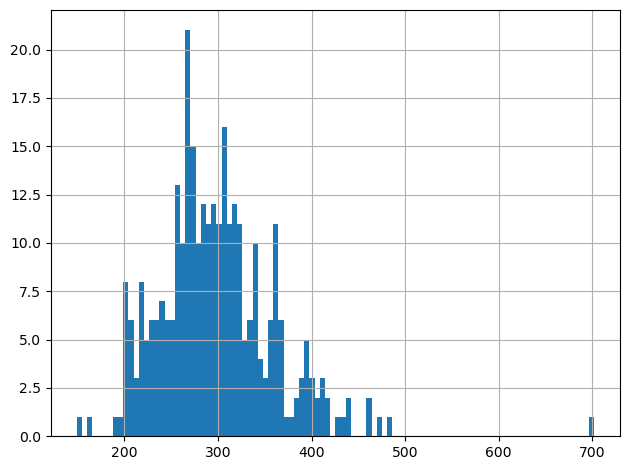

In [26]:
DS.Dat["distcum"].hist(bins=100)

### Plots of drawings

##### For each shape, plot one example stroke at each location

In [ ]:
DS.Dat["shape"].value_counts()

In [ ]:
DS.plotshape_multshapes_egstrokes_grouped_in_subplots(key_subplots="shape_oriented", 
                                                      key_to_extract_stroke_variations_in_single_subplot="gridloc",
                                                      n_examples=20
                                                     );

In [ ]:
# plot, overlaying shapes regardless of gridloc
DS.plotshape_multshapes_egstrokes(n_examples_total_per_shape= 20)

In [ ]:
DS.plotwrap_timecourse_vels_grouped_by_shape(5, savedir="/tmp", also_plot_example_strokes=True)

In [ ]:
SAVEDIR = "/tmp"
plotdrawings_all(DS, SAVEDIR)

In [ ]:
if False:
    # Not needed, above is better (breaks into locations too)
    key_subplots = "shape_char"
    DS.plotshape_multshapes_egstrokes(key_subplots = key_subplots,
                n_examples_total_per_shape = 10, color_by=None, list_shape=None);


    # For each shape, overlay n plots at each location
    DS.plotshape_singleshape_egstrokes_overlaid(shape="Lcentered-4-1-0", nplot=2)

    ##### For each beh stroke, plot it overlayed on its taskstroke
    inds = random.sample(range(len(DS.Dat)), 10)
    DS.plot_beh_and_aligned_task_strokes(inds, True)

In [ ]:
# Debugging stuff
if False:
    # Figure out the prims (base prims, motifs, chars).
    import random
    ind = random.randrange(0, len(D.Dat))

    T = D.Dat.iloc[ind]["Task"]
    Beh = D.Dat.iloc[ind]["BehClass"]

    # chunks summarize
    CLC = T.ChunksListClass
    CLC.print_summary()

    D.plotSingleTrial(ind, task_add_num=True)
    T.plotStrokes(ordinal=True)
    print(T.PlanDat["PrimsCategories"])

In [ ]:
plotscore_all(DS, SAVEDIR)

### OLDER STUFF

##### Only keep taskstrokes that are gotten with single beh stroke

In [ ]:
methods = ["remove_if_multiple_behstrokes_per_taskstroke", "prune_if_shape_has_low_n_trials"]

params = {}
params["prune_if_shape_has_low_n_trials"] = [5]

DS.clean_preprocess_data(methods, params)

##### Prims in grid - behavioral quality

##### Using Task dataset

In [ ]:
from pythonlib.dataset.dataset_strokes import DatStrokes
# Success rate for each task prim

# 1) for each task prim, collect whether it was gotten (or skipped)
# 2) for each task prim, its distribution over ranks.
# 3) For each task prim, its quality

DS = DatStrokes(D, "task")

In [ ]:
# (Not behavior) Distributions of parameters
%matplotlib inline
from pythonlib.dataset.dataset_analy.primitives_task import plotscatter_locations_each_shape

plotscatter_locations_each_shape(DS)


In [ ]:
Plot pairwise distributions of shape, ordinal, location, etc.


### List distribution of extracted shapes,  locations, and their combinations

### Scatter plots

##### for each shape, plot its distribution in spatial locaitons (in task) (and coloring by either size or task kind)

In [ ]:
%matplotlib inline
from pythonlib.dataset.dataset_analy.primitives_task import plotscatter_locations_each_shape

plotscatter_locations_each_shape(DS)


In [ ]:
from pythonlib.tools.pandastools import convert_to_2d_dataframe
convert_to_2d_dataframe(DS.Dat, col1="shape_oriented", col2="gridloc", plot_heatmap=True);

### TIMECOURSE PLOTS - scalars

In [ ]:
# Return list of shapes, ordered by score
# - for each shape, get the mean score.

from pythonlib.tools.pandastools import aggregGeneral
dfagg_shapes = aggregGeneral(DS.Dat, group = ['shape_oriented'], values = ['dist_beh_task_strok']).sort_values("dist_beh_task_strok")

##### What variables affect score?

In [ ]:

# 1) task kind
fig = sns.catplot(data = DS.Dat, x="shape_oriented", y="dist_beh_task_strok", kind="bar", hue="task_kind")
rotateLabel(fig) 


In [ ]:
# 1) which rank (beh stroke)
# fig = sns.catplot(data = DS.Dat, x="shape_oriented", y="dist_beh_task_strok", kind="bar", hue="stroke_index")
# rotateLabel(fig) 
fig = sns.catplot(data = DS.Dat, x="stroke_index", y="dist_beh_task_strok", kind="point", hue="shape_oriented")
rotateLabel(fig) 


In [ ]:
DS.Dat["dataset_trialcode"].isin(good_trialcodes)

In [ ]:
b# only consider trials where he got to N strokes
N = 3 # how many strokes?
from pythonlib.tools.pandastools import grouping_get_inner_items
groupdict = grouping_get_inner_items(DS.Dat, "dataset_trialcode", "stroke_index")
def _has_desired_inds(inds):
    return max(inds)>=N-1

good_trialcodes = [trialcode for trialcode, stroke_inds in groupdict.items() if _has_desired_inds(stroke_inds)]

dfthis = DS.Dat[DS.Dat["dataset_trialcode"].isin(good_trialcodes)]

fig = sns.catplot(data = dfthis, x="stroke_index", y="dist_beh_task_strok", kind="point", hue="shape_oriented")
rotateLabel(fig) 

fig = sns.catplot(data = dfthis, x="shape_oriented", y="dist_beh_task_strok", kind="point", hue="stroke_index")
rotateLabel(fig) 


### Relating drawings to peanut pnut size

In [ ]:
DS.Dat["shape_oriented"]

In [ ]:
# For each shape, split into (pnut size, supervision)

filt_dict = {"shape_oriented":["arcdeep-2-0"]}
DS.plot_egstrokes_grouped_in_subplots(key_subplots="pnut_ext", filtdict=filt_dict);

In [ ]:
# Peanut size
DS.dataset_append_column("pnut_ext")
DS.dataset_append_column("supervision_stage_new")
DS.dataset_append_column("tval_fake")
dfthis = DS.Dat

In [ ]:
fig = sns.relplot(data = dfthis, x="pnut_ext", y="dist_beh_task_strok", kind="line", col="shape_oriented", 
                 col_wrap=4, hue="supervision_stage_new")
fig = sns.relplot(data = dfthis, x="pnut_ext", y="dist_beh_task_strok", kind="scatter", col="shape_oriented", 
                 col_wrap=4, hue="supervision_stage_new")


In [ ]:
fig = sns.catplot(data = dfthis, x="pnut_ext", y="dist_beh_task_strok", kind="bar", col="shape_oriented", 
                 col_wrap=4, hue="supervision_stage_new")
# TODO: only keep those pnut sizes that have both supervision stages.,


In [ ]:
# Time during expt
dfthis = DS.Dat
fig = sns.relplot(data = dfthis, x="tvalfake", y="dist_beh_task_strok", kind="scatter", col="shape_oriented", 
                 col_wrap=4)


##### Plot timecourse of scores for each stroke

In [ ]:
# 1) plot some scalar ascore across time
score_var = "distcum"

DS.dataset_append_column("tvalfake")
dfthis = DS.dataset_slice_by_mult({"shape_oriented":["circle-1-0"]})
sns.scatterplot(data=dfthis, x="tvalfake", y=score_var)

### Plot timecourse of stroke drawings across expt

In [ ]:
import random
shape_to_plot = "V-1-0"

# 1) Take only single prims, or prims on grid
F = {"task_kind":["prims_single", "prims_on_grid"], "shape_oriented":[shape_to_plot]}
inds = DS.dataset_slice_by_mult(F, return_indices=True)

# 2) take random sorted subset
ntoplot = 20
inds_sub = sorted(random.sample(inds, ntoplot))

# 3) Plot examples over time
tvals = DS.Dat.iloc[inds_sub]["tvalfake"].tolist()
DS.plot_multiple(inds_sub, titles=tvals)

##### Plot example strokes for each block, in sequence over the course of the day.


In [ ]:
assert False, "move to Dataset"
# extract bloques
# - order by actual trial
assert np.all(np.diff(D.Dat["tvalfake"])>0), "sort first"
# - find changes
from pythonlib.tools.listtools import extract_novel_unique_items_in_order

# Bloques are only defined within a session
blocks = D.Dat["block"].tolist()
blocks_within_session = False

if blocks_within_session:
    assert False, "code it, run this for each session"
    
blocks_mapped_to, bloques = extract_novel_unique_items_in_order(blocks)

plt.figure()
plt.plot(bloques, blocks_mapped_to, 'ok')

In [ ]:
# Plot example strokes here.


### CLUSTERING shapes (Comparing beh across shapes)

In [ ]:
# OBSOLETE --> all moved to clustering in 220113_analy_strokes_clustering_DS

### OTHER THINGS

##### Plot each stroke

In [ ]:
# Plot (beh)
list_strok = dfdat["strok"].values.tolist()
list_shape = dfdat["shape"].values.tolist()
fig, axes = DS.plot_multiple_strok(list_strok, overlay=False, titles=list_shape, ncols=6)


In [ ]:
list_strok = dfdat["strok_task"].values.tolist()
list_shape = dfdat["shape"].values.tolist()
fig, axes = DS.plot_multiple_strok(list_strok, overlay=False, titles=list_shape, ncols=6)


## Positions of first touch for each stroke

In [ ]:
def F(x):
    return x["strok"][0][:2]
    
DS.Dat = applyFunctionToAllRows(DS.Dat, F, 'pt_first_touch')


# keep only specific location and size
print(DS.Dat["gridloc"].value_counts())
print(DS.Dat["gridsize"].value_counts())

gloc = (0,0)
dfthis = DS.Dat[DS.Dat["gridloc"]==gloc]

gsize = "rig3_3x3_small"
dfthis = dfthis[dfthis["gridsize"]==gsize]

print("N= ", len(dfthis))

# CONFIRM SAME LOC AND SIZE
print(dfthis["gridloc"].value_counts())
print(dfthis["gridsize"].value_counts())

##### Organize them into "sets" based on expected location of first touch.

In [ ]:
from pythonlib.tools.pandastools import grouping_get_inner_items, extract_trials_spanning_variable
from pythonlib.tools.plottools import subplot_helper


n = 15
outdict, levels = extract_trials_spanning_variable(dfthis, "shape_oriented", n_examples=n, return_as_dict=True,
                                                  method_if_not_enough_examples = "prune_subset")

getax, figholder, nplots = subplot_helper(5, 10, len(outdict), SIZE=4)

for i, (shape, list_inds) in enumerate(outdict.items()):
    ax = getax(i)
    
    # get all pts
    pts = DS.Dat.iloc[list_inds]["pt_first_touch"]
    
    for pt in pts:
        ax.plot(pt[0], pt[1], 'x');
    
    # plot the task
    strok_task = DS.extract_strokes(inds=[list_inds[0]], ver_behtask ="task")[0]
    ax.plot(strok_task[:,0], strok_task[:,1], '-.k')
    
    
    ax.grid()
    ax.set_title(shape)

# plot all shapes in order
DS.plot_examples_grid(col_levels=levels)

# =============== [OLD]

### SCORE EACH PRIMITIVE

Each element is a single task stroke (datseg) and its associated beh prims

In [ ]:
# 1) how many strokes required?
# 2) stroke match to image

D.behclass_generate_alltrials()
D.behclass_alignsim_compute()

In [ ]:
D.plotSingleTrial();

In [ ]:
ind = 201
D.plotSingleTrial(ind)
Beh = D.Dat.iloc[ind]["BehClass"]
Beh.alignsim_extract_datsegs_both_beh_task()

In [ ]:
# Go thru each task stroke, extract them like bag of taskstrokes.
DS = DatStrokes(D, "task")

In [ ]:
# For each task stroke, compute things

# 1) number of beh strokes matched to it
def F(x): 
    return len(x["aligned_beh_inds"])

DS.Dat = applyFunctionToAllRows(DS.Dat, F, 'num_beh_strokes')

In [ ]:
# Compute the match between each task stroke and its aligned beh strokes.

ind = 100
DS.Dat.iloc[ind]

In [ ]:
from pythonlib.tools.snstools import rotateLabel

# sns.catplot(data=DS.Dat, x="shape_oriented", y="num_beh_strokes", kind="boxen", aspect=2)
fig = sns.catplot(data=DS.Dat, x="shape_oriented", y="num_beh_strokes", kind="point", aspect=2.5)
rotateLabel(fig)
fig = sns.catplot(data=DS.Dat, x="shape_oriented", y="num_beh_strokes", kind="strip", aspect=2.5)
rotateLabel(fig)

In [ ]:
# # Plot distributions of scores for each prim
# fig = sns.catplot(data=DS.Dat, x="shape_oriented", y="task_beh_dist", aspect=2.5)
# rotateLabel(fig)
# fig = sns.catplot(data=DS.Dat, x="shape_oriented", y="task_beh_dist", kind="violin", aspect=2.5)
# rotateLabel(fig)

In [ ]:
# # Does score depend onlocation?
# # Plot distributions of scores for each prim
# fig = sns.catplot(data=DS.Dat, x="gridloc", y="task_beh_dist", aspect=2.5)
# rotateLabel(fig)
# fig = sns.catplot(data=DS.Dat, x="gridloc", y="task_beh_dist", kind="point", aspect=2.5)
# rotateLabel(fig)
# fig = sns.catplot(data=DS.Dat, x="gridloc", y="num_beh_strokes", aspect=2.5)
# rotateLabel(fig)
# fig = sns.catplot(data=DS.Dat, x="gridloc", y="num_beh_strokes", kind="point", aspect=2.5)
# rotateLabel(fig)

In [ ]:
# Plot a single example of each stroke
DS.plot_egstrokes_grouped_in_subplots(key_to_extract_stroke_variations_in_single_subplot=None,
                                      n_examples = 1)
                  

In [ ]:
# Input here:
shape = "V-1-0"
nplot = 5
ver_behtask = "beh"

# Extract and plot
F = {"task_kind":["prims_on_grid"], "shape_oriented":[shape]}
inds = DS.dataset_slice_by_mult(F, return_indices=True)
if len(inds)>nplot:
    inds = random.sample(inds, nplot)
DS.plot_strokes_overlaid(inds[:nplot], ver_behtask=ver_behtask)

In [ ]:
# Order the prims from best to worst.



### IN PROGRESS BELOW

##### Plot distributions as histograms

In [ ]:


list_date = [DS.dataset_extract('date', i) for i in range(len(DS.Dat))]
DS.Dat["date"] = list_date

In [ ]:
DS.Dat["date"].value_counts()

In [ ]:
from pythonlib.tools.pandastools import filterPandas
F = {
    "task_kind":["prims_single", "prims_on_grid"],
}
dfthis = filterPandas(DS.Dat, F)

fig = sns.catplot(data=dfthis, col = "gridloc", kind="count", x="shape_oriented", row="date", hue="task_kind")
rotateLabel(fig)
fig.savefig("/tmp/fig.pdf")

In [ ]:
fig = sns.catplot(data=dfthis, col = "gridloc", kind="count", x="shape_oriented", hue="task_kind")
rotateLabel(fig)
fig.savefig("/tmp/fig.pdf")

In [ ]:
fig = sns.catplot(data=dfthis,  kind="count", x="shape_oriented", row="date", hue="task_kind")
rotateLabel(fig)
fig.savefig("/tmp/fig.pdf")